# Exploratory Data Analysis of Telco Customer Churn

This notebook walks through the process of analyzing the Telco Customer Churn dataset. The goal is to understand the data's structure, identify key variables, and uncover the factors that are most associated with customer churn.

### Importing the necessary libraries for data analysis and visualization

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Data Loading

In [2]:
data=pd.read_excel('Telco-Customer-Churn_15081388-b1c7-4a07-a581-6b6a494e6346.xlsx')

#### Displaying the first 5 rows to get an overview

In [3]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Data Inspection and Cleaning

Before analysis, it's crucial to understand the dataset's characteristics and clean it up. This involves checking data types, looking for missing values, and correcting formats.

### Dataset Shape and Info

We check the number of rows and columns, and get a summary of the data types for each column.

In [4]:
data.shape

(7043, 21)

**Observation**: The dataset has **7043 rows** and **21 columns**

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


#### Checking for missing values (if any)

In [7]:
data.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


**Observation:** There are **no missing values** observed in the dataset.

In [8]:
data.dtypes

,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


As observed above, **TotalCharges** is of **object** data type. Thus, we need to coonvert this to **float** to proceed for further data analysis.

#### Converting 'TotalCharges' to float data type

In [14]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
data.dtypes

,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


In [ ]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


Now, as observed above, the describe function considers 'TotalCharges' in numeric calculations header.

In [15]:
data.index

RangeIndex(start=0, stop=7043, step=1)

In [16]:
data.nunique()

,0
customerID,7043
gender,2
SeniorCitizen,2
Partner,2
Dependents,2
tenure,73
PhoneService,2
MultipleLines,3
InternetService,3
OnlineSecurity,3


## Analysing 'Churn' header

In [22]:
churn_count=data['Churn'].value_counts()
churn_count

,count
Churn,
No,5174
Yes,1869


<Axes: xlabel='Churn', ylabel='count'>

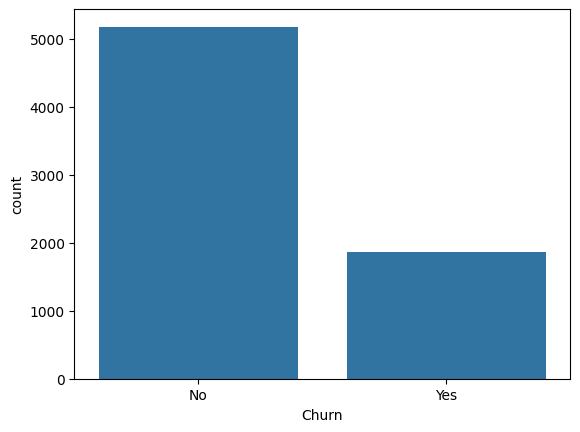

In [23]:
sns.countplot(data=data, x='Churn')

In [24]:
churn_rate=churn_count['Yes']*100/(churn_count['Yes']+churn_count['No'])
churn_rate.round(2) #Percentage Churn Rate

np.float64(26.54)

**Observation:** A major chunk (26.54%) have left the service.

## Univariate Analysis
We now examine the distribution of categorical features individually.

#### Distribution of Gender

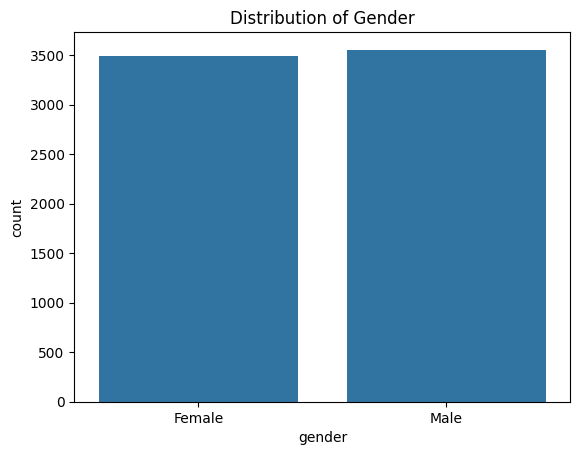

In [25]:
sns.countplot(data=data, x='gender')
plt.title('Distribution of Gender')
plt.show()

#### Distribution of Senior Citizens

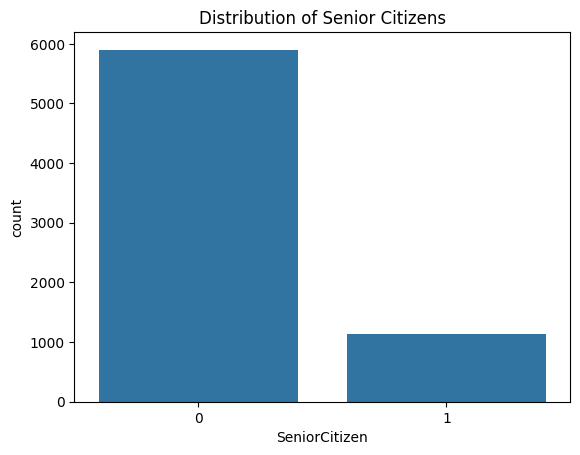

In [26]:
sns.countplot(data=data, x='SeniorCitizen')
plt.title('Distribution of Senior Citizens')
plt.show()

#### Distribution of Partners

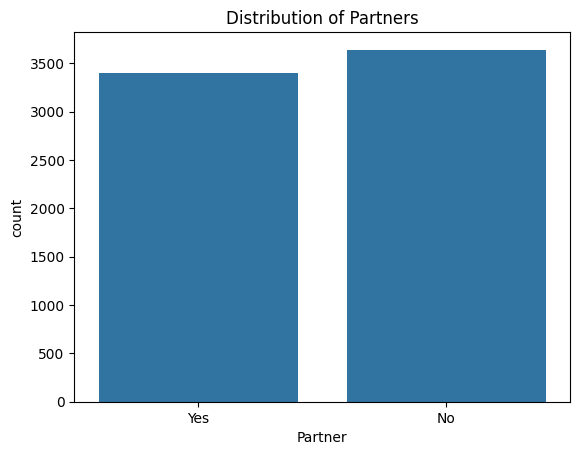

In [27]:
sns.countplot(data=data, x='Partner')
plt.title('Distribution of Partners')
plt.show()

#### Distribution of Contract

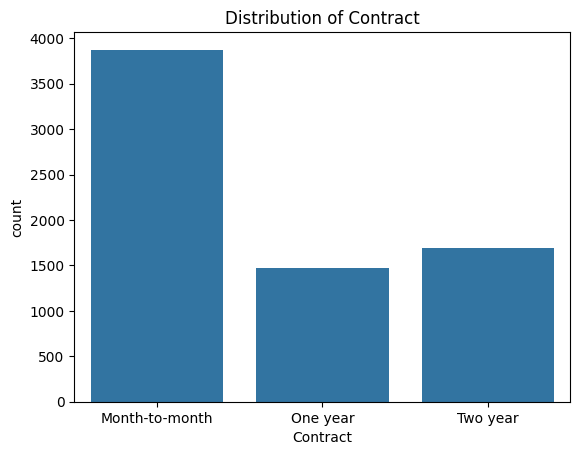

In [28]:
sns.countplot(data=data, x='Contract')
plt.title('Distribution of Contract')
plt.show()

#### Distribution of InternetService

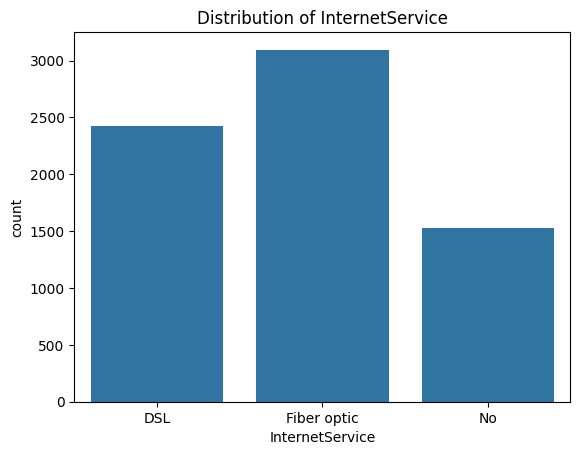

In [29]:
sns.countplot(data=data, x='InternetService')
plt.title('Distribution of InternetService')
plt.show()

## Bivariate Analysis
We now explore how customer churn relates to other features.

#### Churn Rate by Senior Citizen Status

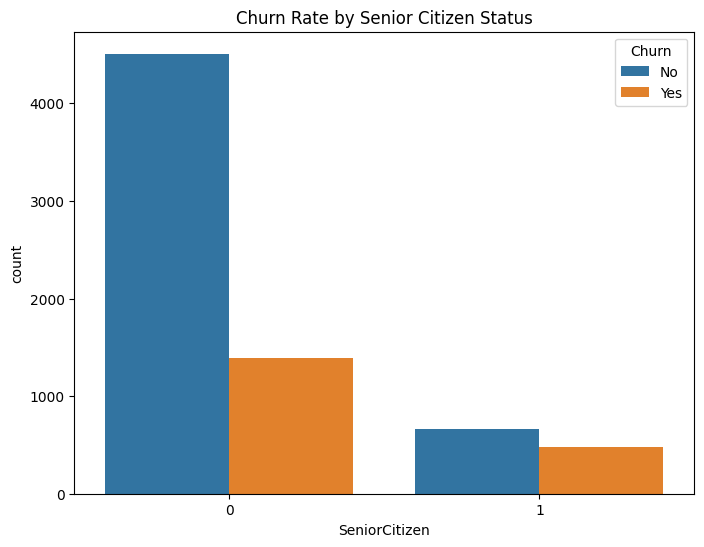

In [30]:
plt.figure(figsize=(8, 6))
sns.countplot(x='SeniorCitizen', hue='Churn', data=data)
plt.title('Churn Rate by Senior Citizen Status')
plt.show()

#### Churn Rate by Contract Type

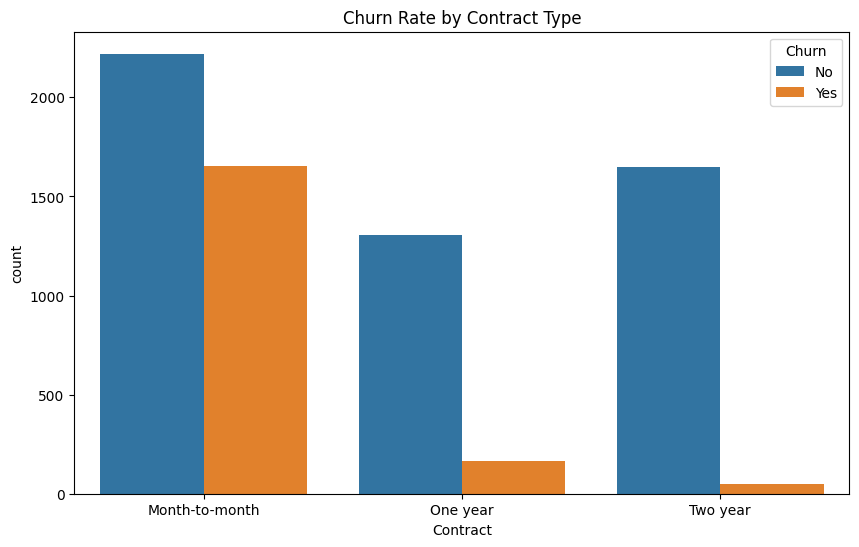

In [31]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Contract', hue='Churn', data=data)
plt.title('Churn Rate by Contract Type')
plt.show()

#### Churn Rate by Internet Service Type

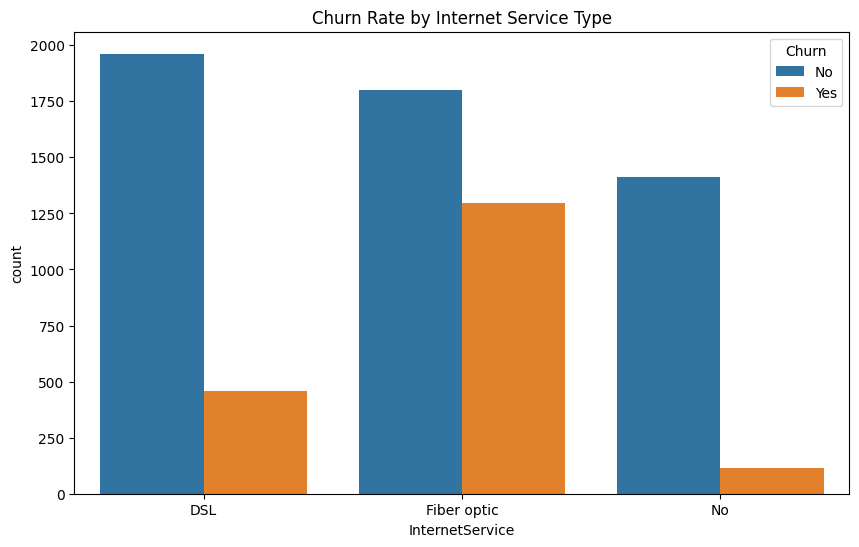

In [32]:
plt.figure(figsize=(10, 6))
sns.countplot(x='InternetService', hue='Churn', data=data)
plt.title('Churn Rate by Internet Service Type')
plt.show()

####Churn Rate by Payment Method

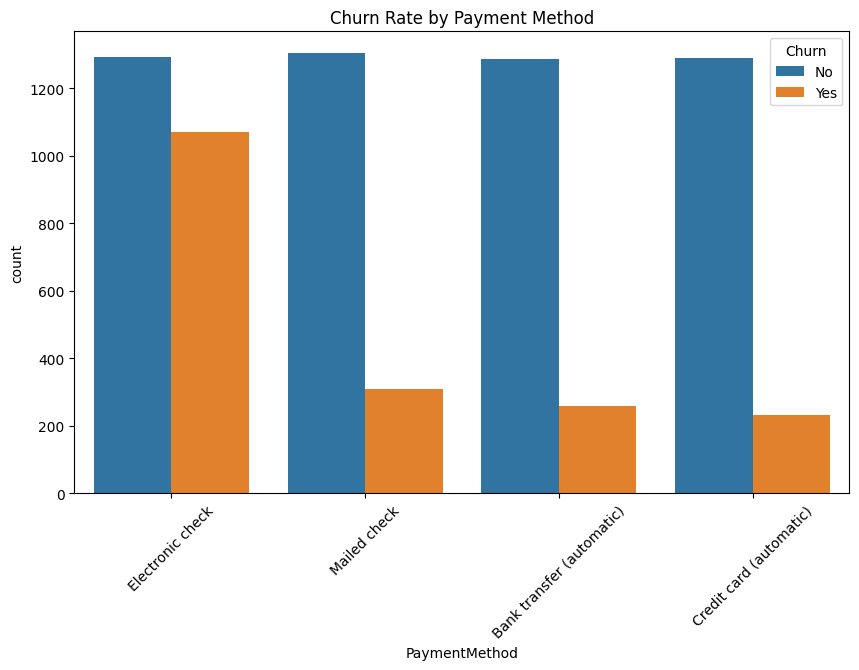

In [37]:
plt.figure(figsize=(10, 6))
sns.countplot(x='PaymentMethod', hue='Churn', data=data)
plt.xticks(rotation=45)
plt.title('Churn Rate by Payment Method')
plt.show()

**Observations:**
- Senior citizens have a higher churn rate.
- Month-to-month contracts experience much higher churn than long-term contracts.
- Fiber optic internet users show higher churn compared to DSL.
- Electronic check payment method users churn more compared to other users.

####Distribution of Tenure by Churn Status

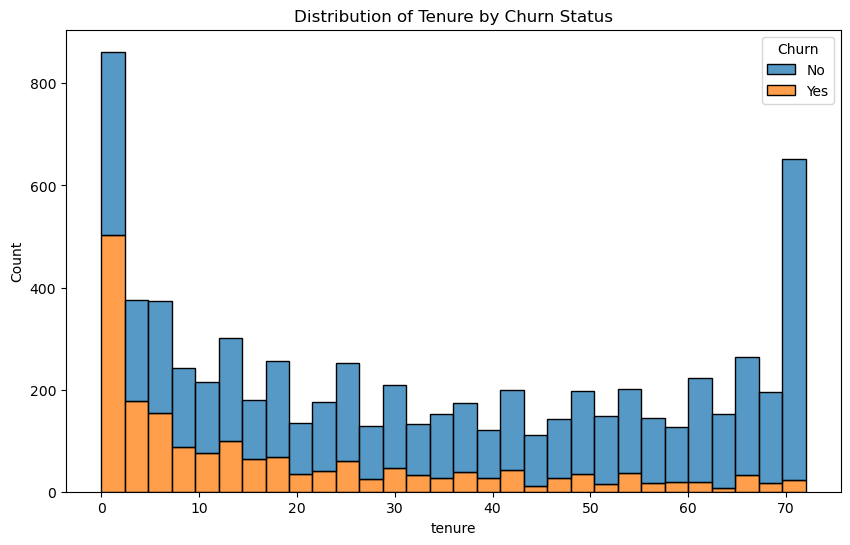

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='tenure', hue='Churn', multiple='stack', bins=30)
plt.title('Distribution of Tenure by Churn Status')
plt.show()

**Observation:** Customers with shorter tenure (newer customers) tend to churn more frequently.

###Q-Q Plot of Monthly Charges for Churned Customers (Senior Citizens vs Non-Senior Citizens)

The Q-Q plot compares the monthly charges distribution between churned senior and non-senior citizens.

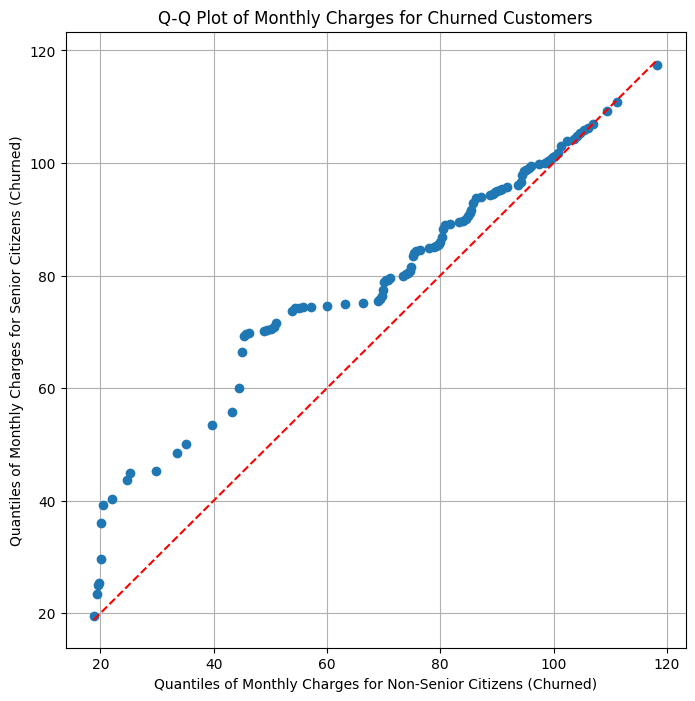

In [33]:
# Separating data for churned senior and non-senior citizens
sc_churn = data[(data['SeniorCitizen'] == 1) & (data['Churn'] == 'Yes')]
nsc_churn = data[(data['SeniorCitizen'] == 0) & (data['Churn'] == 'Yes')]

# Preparing the data for the Q-Q plot
monthly_charges_sc = sc_churn['MonthlyCharges']
monthly_charges_nsc = nsc_churn['MonthlyCharges']

# Creating quantiles for the Q-Q plot
quantiles_sc = np.quantile(monthly_charges_sc, np.arange(0, 1.01, 0.01))
quantiles_nsc = np.quantile(monthly_charges_nsc, np.arange(0, 1.01, 0.01))

# Creating the Q-Q plot
plt.figure(figsize=(8, 8))
plt.plot(quantiles_nsc, quantiles_sc, 'o')
plt.plot([min(quantiles_nsc), max(quantiles_nsc)], [min(quantiles_nsc), max(quantiles_nsc)], 'r--')
plt.xlabel('Quantiles of Monthly Charges for Non-Senior Citizens (Churned)')
plt.ylabel('Quantiles of Monthly Charges for Senior Citizens (Churned)')
plt.title('Q-Q Plot of Monthly Charges for Churned Customers')
plt.grid(True)
plt.show()

**Observations:**

- The plot shows deviations from the diagonal line, meaning the distribution of charges differs between the two groups.

- In particular, churned senior citizens tend to have higher monthly charges compared to non-seniors at equivalent quantiles.

- This suggests that pricing may disproportionately impact seniors, possibly due to affordability concerns.

###Correlation Heatmap

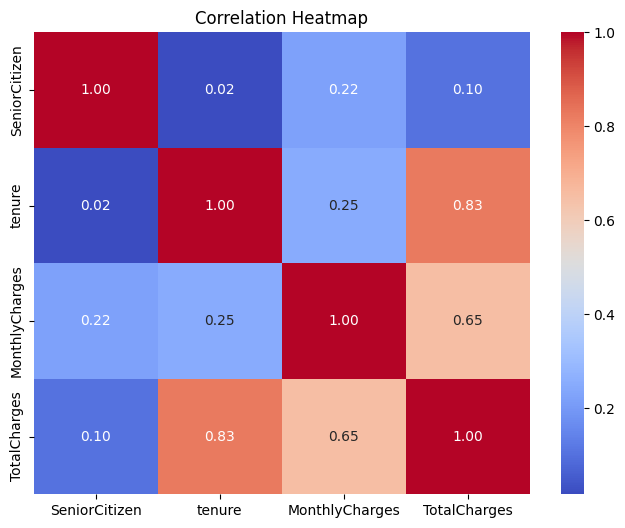

In [34]:
plt.figure(figsize=(8, 6))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

**Observations:**

- Tenure and TotalCharges show a very strong positive correlation (~0.83). This makes sense since total charges accumulate over time.

- MonthlyCharges and TotalCharges are also strongly correlated (~0.65), as higher monthly fees directly increase total bills.

- SeniorCitizen has very weak correlation with the financial variables, suggesting that senior status itself isn’t directly tied to charges but may still influence churn behavior.

- Overall, the heatmap confirms that financial features are interdependent, with tenure and monthly charges being strong churn drivers.

###Boxplot of Monthly Charges by Churn

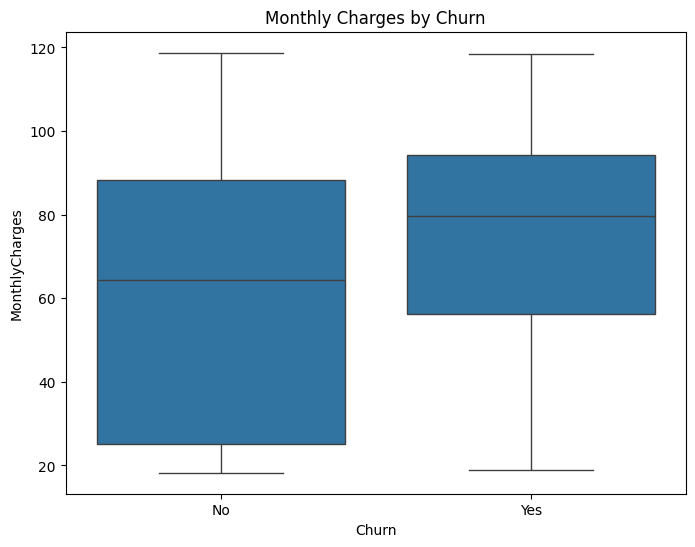

In [35]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='MonthlyCharges', data=data)
plt.title('Monthly Charges by Churn')
plt.show()

**Additional Observations from Boxplots:**

- Customers who churn tend to have **higher monthly charges** than those who stay.  
- The spread of monthly charges is larger for churned customers, indicating churn across various billing levels.  
- Outliers confirm that extremely high charges are strongly associated with churn.

## Key Insights (Overall):
- Churn rate is **26.5%**, a significant proportion of customers.  
- **Senior citizens, customers on month-to-month contracts, and fiber optic internet users** are more prone to churn.  
- **High monthly charges and low tenure** are major churn drivers.  
- Customers paying via **electronic check** churn disproportionately.  
- Q-Q plot analysis confirms that senior citizens who churn generally face higher monthly charges than churned non-seniors, pointing to cost sensitivity among older customers.
- Tenure and TotalCharges are strongly correlated (0.83), which makes sense since longer-tenure customers accumulate more charges. MonthlyCharges and TotalCharges are moderately correlated (0.65). SeniorCitizen is weakly correlated with financial variables, but indirectly affects churn through higher pricing sensitivity.
- Retention strategies should target **new customers with high charges**, offering incentives or contract adjustments.